In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Linear jregression model function 
def model(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    mse=mean_squared_error(y_pred,y_test)
    rmse=np.sqrt(mse)
    r2=r2_score(y_pred,y_test)
    coef=lr.coef_
    
    intercept=lr.intercept_
    return mse,rmse,r2,coef



In [3]:
df=pd.read_csv("E:\\sukamal sir machine learning\\Python_ML_new-master\\Automobile_data.csv")

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [5]:
corr=df.corr()

In [6]:
corr

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
symboling,1.000000,-0.232919,-0.541038,-0.105790,-0.035823,0.034606,-0.085781
width,-0.232919,1.000000,0.279210,0.735433,-0.642704,-0.677218,0.718253
height,-0.541038,0.279210,1.000000,0.067149,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.735433,0.067149,1.000000,-0.653658,-0.677470,0.852995
city-mpg,-0.035823,-0.642704,-0.048640,-0.653658,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.677218,-0.107358,-0.677470,0.971337,1.000000,-0.679048
price,-0.085781,0.718253,0.132444,0.852995,-0.654611,-0.679048,1.000000


In [7]:
corr = corr["price"]
corr

symboling     -0.085781
width          0.718253
height         0.132444
engine-size    0.852995
city-mpg      -0.654611
highway-mpg   -0.679048
price          1.000000
Name: price, dtype: float64

In [8]:
corr.drop(["price"],inplace=True)

In [9]:
corr=corr[corr > 0.6]
corr

width          0.718253
engine-size    0.852995
Name: price, dtype: float64

In [10]:
cols=corr.index
cols

Index(['width', 'engine-size'], dtype='object')

<Figure size 432x288 with 0 Axes>

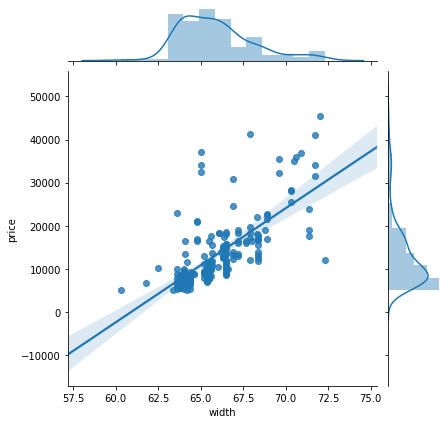

<Figure size 432x288 with 0 Axes>

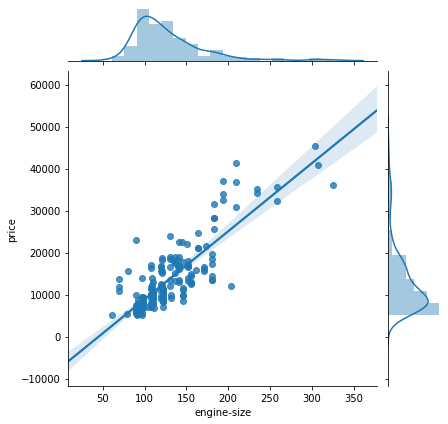

In [11]:
for col in cols:
    plt.figure()
    sns.jointplot(data=df,x=col,y="price",kind="reg")
    plt.show()

In [12]:
# modelwith engine size

result=model(df[["engine-size"]],df["price"])
print("engine-size RMSE :",result[0])
print("engine-size r2_score :",result[1])
print("engine-size COEF :",result[2])
print("engine-size intercept :",result[3][0])

engine-size RMSE : 15132878.513087993
engine-size r2_score : 3890.100064662604
engine-size COEF : 0.6813317202176101
engine-size intercept : 163.15008783681884


In [14]:
#model with width 
result=model(df[["width"]],df["price"])
print("engine-size RMSE :",result[0])
print("engine-size r2_score :",result[1])
print("engine-size COEF :",result[2])
print("engine-size intercept :",result[3][0])

engine-size RMSE : 23030175.736583684
engine-size r2_score : 4798.976530113862
engine-size COEF : 0.1635864972526151
engine-size intercept : 2522.0407119540987


# Multiple Linear Regression 

In [16]:
result=model(df[["width","engine-size"]],df["price"])
print("mse:",result[0])
print("r2_score :",result[1])
print("coef :",result[2])
print("intercept :",result[3][0])


mse: 13934545.822418857
r2_score : 3732.900457073408
coef : 0.7187957732515151
intercept : 670.2147227719428


# Check  multicolinearity

In [17]:
from scipy.stats import pearsonr

In [21]:
pearsonr(df["engine-size"],df["price"])[0]

0.8529950320090319

In [22]:
pearsonr(df["width"],df["price"])[0]

0.7182531842731488

# Variance in Residual

In [27]:
x=df[["engine-size","width"]]
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
residual=y_pred-y_test

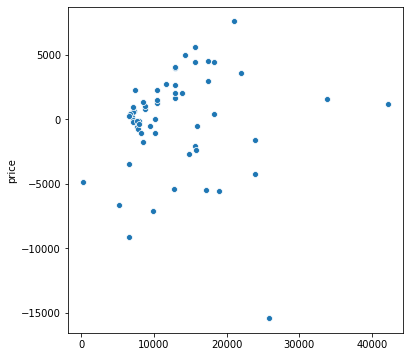

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(y_pred,residual)
plt.show()

# residual plot histogram

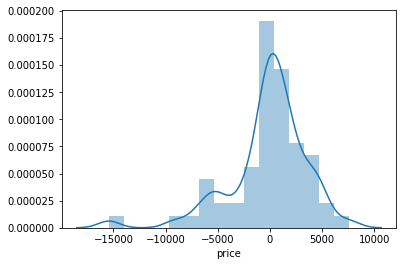

In [30]:
plt.figure()
sns.distplot(residual)
plt.show()